<a href="https://colab.research.google.com/github/Shreyas3108/Decodr13_Apr/blob/master/Modelling_Intro_Lreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/salary_data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lreg = LinearRegression()

In [8]:
lreg.fit(df[['YearsExperience']] , df['Salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lreg.intercept_

25792.200198668696

In [10]:
lreg.coef_

array([9449.96232146])

In [13]:
(lreg.coef_[0] * 2.0) + lreg.intercept_

44692.12484157884

In [0]:
df['prediction'] = lreg.predict(df[['YearsExperience']])

In [0]:
import matplotlib.pyplot as plt

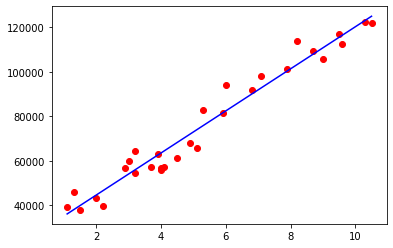

In [21]:
#df.plot(x='YearsExperience',y = 'Salary',kind = 'scatter')
#df.plot(x='YearsExperience',y = 'prediction',kind = 'line')
#plt.show()

fig = plt
fig.scatter(df['YearsExperience'], df['Salary'], color='red')
fig.plot(df['YearsExperience'], df['prediction'], color='blue')

In [23]:
lreg.intercept_ ### But your c from y = mx+c 

25792.200198668696

In [25]:
lreg.coef_ ### Nothing but your m from y = mx+c

array([9449.96232146])

In [0]:
diamond = pd.read_csv('https://github.com/tidyverse/ggplot2/raw/master/data-raw/diamonds.csv')

In [4]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
diamond['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [0]:
d1 = {'Fair':1,'Good':2,'Very Good':3 , 'Premium':4 , 'Ideal' : 5}

In [0]:
diamond['cut_num'] = diamond.cut.replace(d1)

In [9]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4


In [13]:
diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cut_num'],
      dtype='object')

In [0]:
input_col = ['carat', 'depth', 'table', 'x', 'y','z', 'cut_num']

out = 'price'
  

In [15]:
lreg.fit(diamond[input_col] , diamond[out])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lreg.intercept_

14059.538778536064

In [17]:
lreg.coef_

array([10660.23033165,  -150.75553293,   -54.01529955, -1324.57751506,
          80.90013121,    58.69827701,   179.1429254 ])

In [0]:
from sklearn.metrics import *

In [24]:
r2_score(diamond[out],lreg.predict(diamond[input_col]))

0.8609262313977839

In [11]:
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
X = sm.add_constant(diamond[input_col])
Y = diamond[out]

In [0]:
mod = sm.OLS(Y,X)
fii = mod.fit()

In [23]:
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 4.769e+04
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        18:01:54   Log-Likelihood:            -4.7057e+05
No. Observations:               53940   AIC:                         9.412e+05
Df Residuals:                   53932   BIC:                         9.412e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.406e+04    517.210     27.183      0.000     1.3e+04    1.51e+04
carat       1.066e+04     62.825    169.681      0.000    1.05e+04    1.08e+04
depth       -150.7555      5.837    -25.827      0.000    -162.197    -139.315
table        -54.0153      3.597    -15.016      0.000     -61.066     -46.965
x          -1324.5775     42.810    -30.941      0.000   -1408.486   -1240.669
y             80.9001     25.374      3.188      0.001      31.166     130.634
z             58.6983     44.041      1.333      0.183     -27.622     145.018
cut_num      179.1429      6.962     25.733      0.000     165.498     192.788
==============================================================================
Omnibus:                    14248.416   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           371175.083
Skew:                           0.695   Prob(JB):                         0.00
Kurtosis:                      15.776   Cond. No.                     6.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
inp1 = ['carat', 'depth', 'table', 'x', 'y', 'cut_num']

In [0]:
X1 = sm.add_constant(diamond[inp1])
Y1 = diamond[out]

In [0]:
mod1 = sm.OLS(Y1,X1)
fii1 = mod1.fit()

In [18]:
fii1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 5.564e+04
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        18:05:56   Log-Likelihood:            -4.7057e+05
No. Observations:               53940   AIC:                         9.412e+05
Df Residuals:                   53933   BIC:                         9.412e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.386e+04    494.728     28.012      0.000    1.29e+04    1.48e+04
carat       1.066e+04     62.824    169.693      0.000    1.05e+04    1.08e+04
depth       -147.3616      5.253    -28.055      0.000    -157.657    -137.067
table        -54.1157      3.596    -15.047      0.000     -61.165     -47.067
x          -1293.3789     35.844    -36.084      0.000   -1363.633   -1223.124
y             85.4757     25.141      3.400      0.001      36.199     134.753
cut_num      179.0032      6.961     25.715      0.000     165.360     192.647
==============================================================================
Omnibus:                    14248.853   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           370929.681
Skew:                           0.695   Prob(JB):                         0.00
Kurtosis:                      15.771   Cond. No.                     6.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""